#### Exercise 7:
Consider the filter below:

$h(x,y)=exp(\frac{-x'^2}{2\sigma_x ^ 2}-\frac{y'^2}{2\sigma_y ^2})cos(2\pi fx')$

$x'=xcos\theta +ysin\theta$

$y'=-xsin\theta+ycos\theta$

$f=0.1$

$\theta=k\frac{\pi}{8}$

$k=0,1,\cdots,7$

$\sigma_x=\sigma_y=4$

##### A)Apply the filter above using a  33*33 window on a finger print photo

##### B)Divide each filtered photo to blocks of 16*16 and compute standard deviation for each block. Then replace each block's pixels values by it's respective variance and display the results.


### importing used libraries

In [1]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

### 2d Convolution Implementation using zero padding for border conditions

In [2]:
# 2 Dimentional zero padding convolution  a very Slow Approach in comparison to cv2.filter2d

def convolution2d(img, kernel):
    #     Rotating Kernel Window 180 Degree
    window = np.rot90(kernel, k=2, )

    kernelHeight, kernelWidth = kernel.shape

    #     checking ForRight Kernel Dimentions
    if kernelHeight % 2 != 1 or kernelWidth % 2 != 1:
        raise Exception("kernel dimentions should be odd numbers")

    #     padding edges size for both x(m) and y(n) ddimentions
    m = int((kernelHeight - 1) / 2)
    n = int((kernelWidth - 1) / 2)

    #     PreAllocation
    if np.ndim(img) == 3:
        imgHeight, imgWidth, imgChanals = img.shape
        window = np.dstack(window * imgChanals)
        window = np.transpose(window, axes=[1, 2, 0])
    if np.ndim(img) == 2:
        imgHeight, imgWidth = img.shape
        imgChanals = 1

#     Zero Padding
    if imgChanals != 1:
        padded = np.zeros((imgHeight + 2 * m, imgWidth + 2 * n, imgChanals))
        padded[m:-m, n:-n, :] = img
    else:
        padded = np.zeros((imgHeight + 2 * m, imgWidth + 2 * n))
        padded[m:-m, n:-n] = img

    fullConv = padded.astype(np.float64)
    for x in range(m, padded.shape[0] - m):
        for y in range(n, padded.shape[1] - n):
            fullConv[x, y] = np.sum(padded[x - m:x + m + 1, y - n:y + n + 1] * window, axis=(0, 1))

    result = fullConv[m:-m, n:-n]

    result = result

    return result


### Part A

#### A function to generate desired filter by providing different arguments in the filter

In [3]:
def generateFilter(k,windowSize=(33,33),f=0.1,sigmax=4,sigmay=4):
    
    filter=np.zeros(windowSize)
    
    borderX,borderY=np.floor(np.array(windowSize)/2).astype(int)
    
    theta=k*math.pi/8
    
    for x in range(-borderX,borderX+1):
        for y in range(-borderY,borderY+1):
            
            xp=x*math.cos(theta)+y*math.sin(theta)
            yp=-x*math.sin(theta)+y*math.cos(theta)
            
            filter[x-borderX-1,y-borderY-1]=math.exp(-xp**2/(2*sigmax**2)-yp**2/(2*sigmay**2))*math.cos(2*math.pi*f*xp)
            
    return filter
            

### Part B

#### A function to perform the operation and proccess described in the second part

In [4]:
def replaceBlocksPixelViaStadnardDeviation(img,blockSize=(16,16)):
    
    result=np.zeros_like(img)
    imgHeight,imgWidth=img.shape
    xStep,yStep=blockSize
    for x in range(0,imgHeight,xStep):
        for y in range(0,imgWidth,yStep):
            result[x:x+xStep,y:y+yStep]=math.sqrt(img[x:x+xStep,y:y+yStep].var())
    return result
            
            
            

### processings ...

In [53]:
#opening the image in grayscale
img=cv2.imread("6.tif",0).astype(np.float64)

In [56]:
#### #PreAllocating
partA=np.zeros(8,dtype=np.ndarray)
partB=np.zeros(8,dtype=np.ndarray)

#parameters to change
kernelWindowSize=(33,33)
frequency=.1
sigmaX=4
sigmaY=4
stadnadrDeviationReplaceMentWindow=(16,16)

# k is the same constant as in the formula's
for k in range(8):
    kernel=generateFilter(k,kernelWindowSize,frequency,sigmax=sigmaX,sigmay=sigmaY)
    # it is also possible to use filter2d function in opencv to perform the filtering
    # using the convoltion2d function to perform the filtering results in defferent results
    # due to the different border condition Assumed. In convolution2d function zero padding is used for border condition.
    # ilteredImg=cv2.filter2D(img,-1,kernel)
    filteredImg=convolution2d(img,kernel)
    partA[k]=filteredImg
    result=replaceBlocksPixelViaStadnardDeviation(filteredImg)
    partB[k]=result


### Displaying results

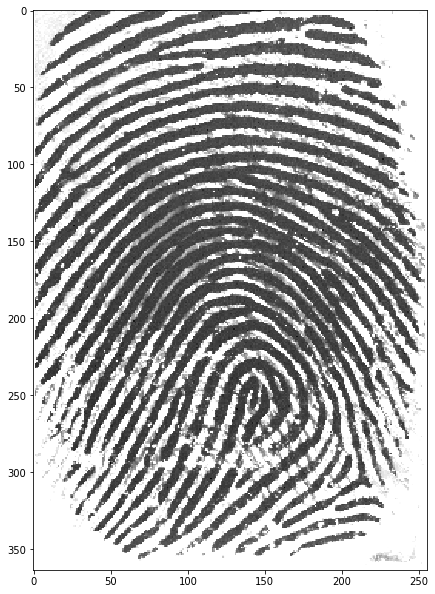

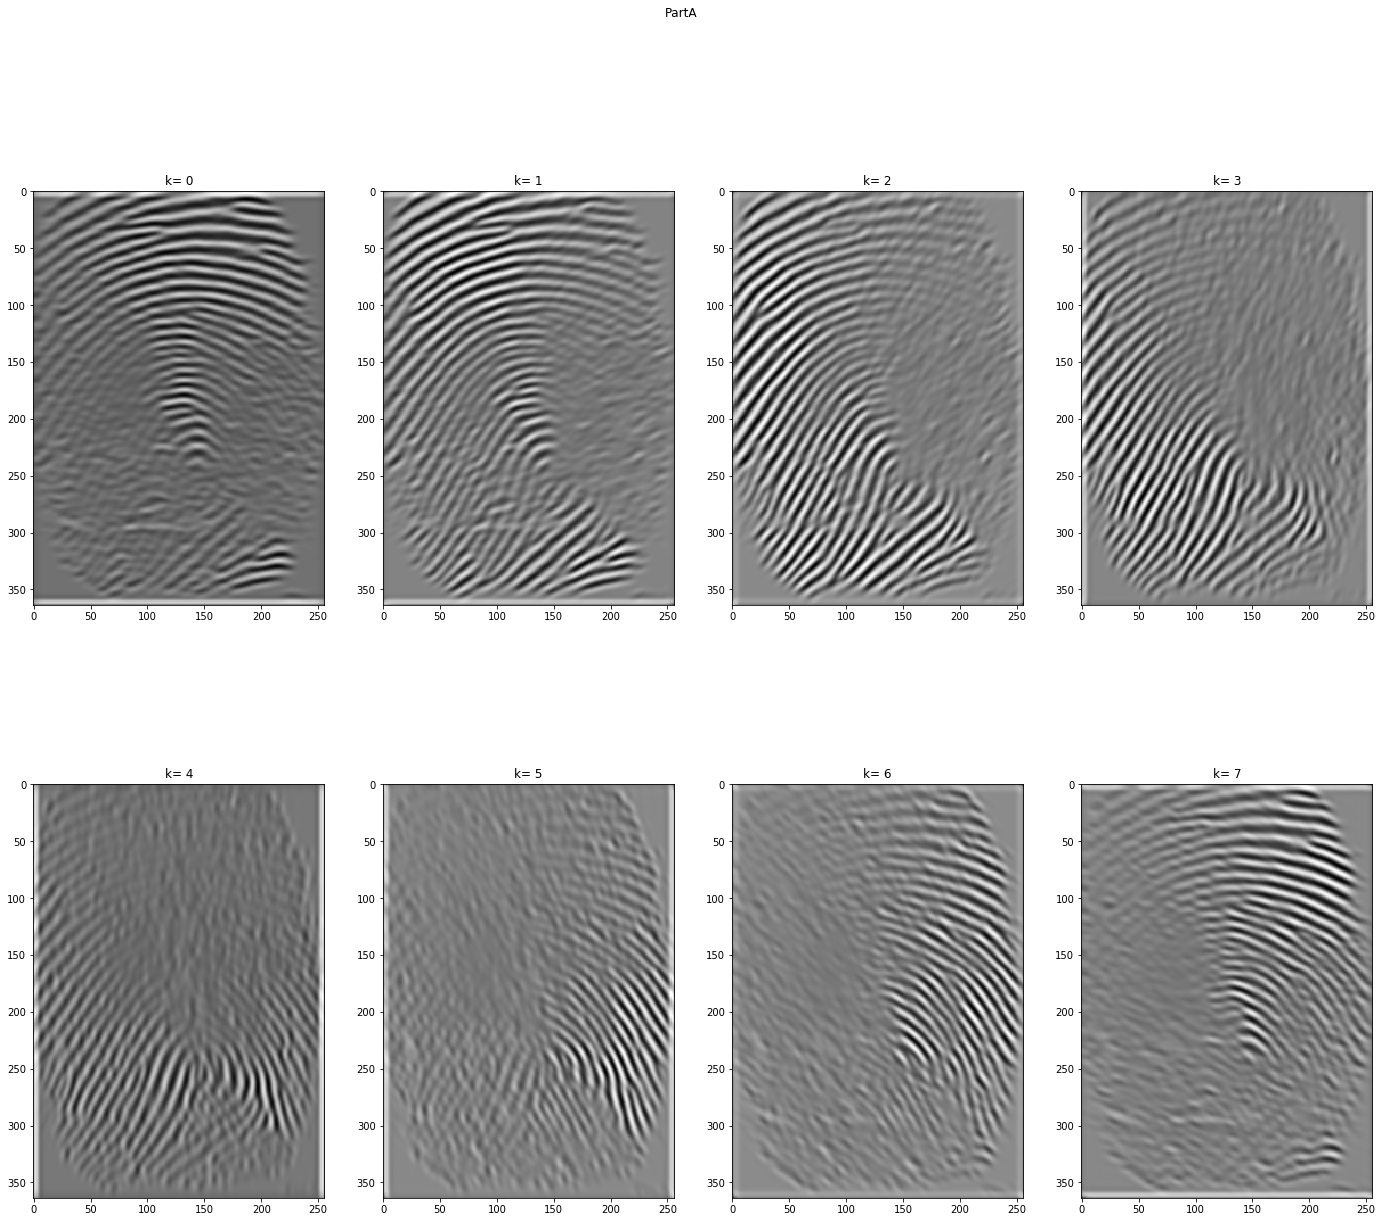

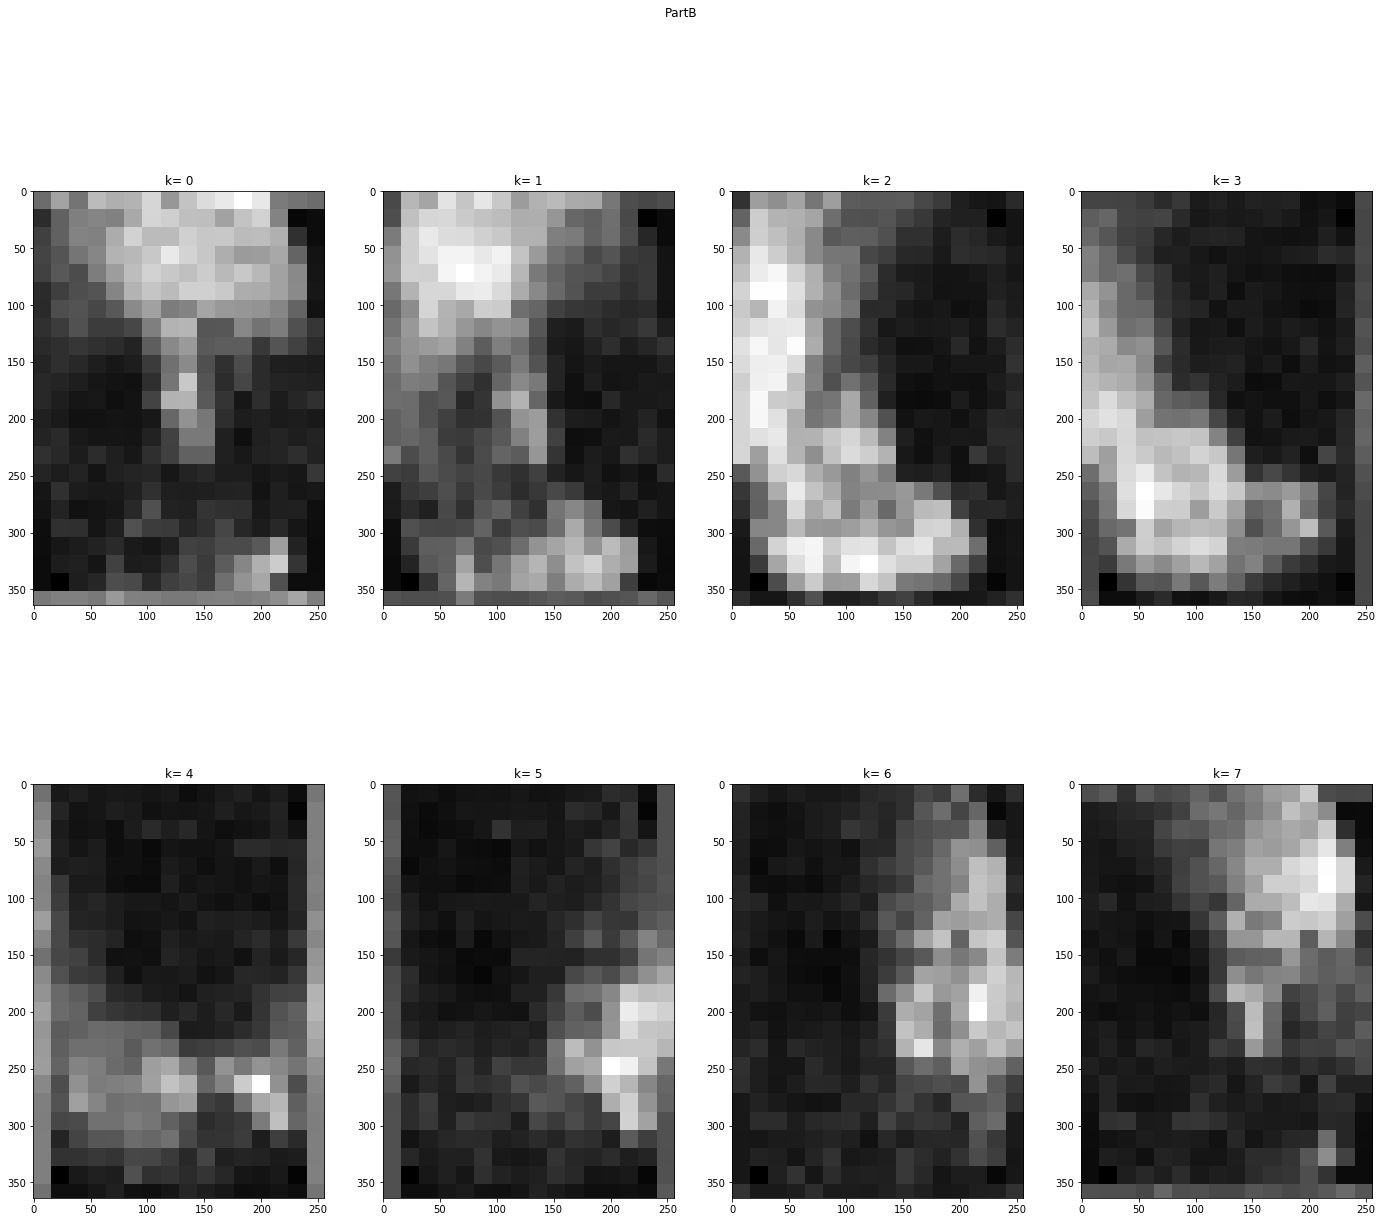

In [52]:
# display main Image
plt.figure(figsize=(24,20)).add_subplot(1,3,2).imshow(img,cmap='gray')

figA=plt.figure(figsize=(24,20))
figA.suptitle("PartA")
figB=plt.figure(figsize=(24,20))
figB.suptitle("PartB")

for i in range(8):
    figA.add_subplot(2,4,i+1,title="k= " +str(i)).imshow(partA[i],cmap='gray')


for i in range(8):
    figB.add_subplot(2,4,i+1,title="k= " +str(i)).imshow(partB[i],cmap='gray')
